In [11]:
import analysis as an_module
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
import pandas as pd

In [12]:
class GoogleTrendsLoader:
    def __init__(self, kw_list, timeframe='today 12-m'):
        """Инициализация параметров поиска.
        :param kw_list: Список ключевых слов.
        :param timeframe: Период времени для анализа (по умолчанию последние 3 месяца).
        """
        self.kw_list = kw_list
        self.timeframe = timeframe
        self.pytrends = TrendReq(hl='en-US', tz=360)
    
    def get_trends_data(self):
        """Загружает данные Google Trends по ключевым словам."""
        self.pytrends.build_payload(self.kw_list, cat=0, timeframe=self.timeframe, geo='', gprop='')
        data = self.pytrends.interest_over_time()
        return data

    def save_data_to_csv(self, data, filename='trends_data.csv'):
        """Сохраняет данные в CSV файл."""
        data.to_csv(filename)

In [13]:
# Загрузка данных Google Trends
loader = GoogleTrendsLoader(kw_list=["data science"], timeframe='today 12-m')
data = loader.get_trends_data()
data = data.infer_objects(copy=False)
data.reset_index(inplace=True)

In [14]:
# Анализ временного ряда
ts_analysis = an_module.TimeSeriesAnalysis(data['data science'])
results_df = ts_analysis.get_results()
results_df = pd.concat([data['date'], results_df], axis=1)

In [15]:
# Сохранение результатов в Excel
ts_analysis.save_results_to_excel(results_df, 'trend_analysis_results.xlsx')
print(results_df)

         date  Original Data  Moving Average  Differential  Maxima  Minima  \
0  2023-11-05             84             NaN           NaN     NaN     NaN   
1  2023-11-12             79             NaN          -5.0     NaN     NaN   
2  2023-11-19             75       79.333333          -4.0     NaN    75.0   
3  2023-11-26             80       78.000000           5.0     NaN     NaN   
4  2023-12-03             84       79.666667           4.0    84.0     NaN   
5  2023-12-10             78       80.666667          -6.0     NaN     NaN   
6  2023-12-17             77       79.666667          -1.0     NaN     NaN   
7  2023-12-24             71       75.333333          -6.0     NaN    71.0   
8  2023-12-31             81       76.333333          10.0     NaN     NaN   
9  2024-01-07             90       80.666667           9.0    90.0     NaN   
10 2024-01-14             86       85.666667          -4.0     NaN    86.0   
11 2024-01-21             94       90.000000           8.0     N

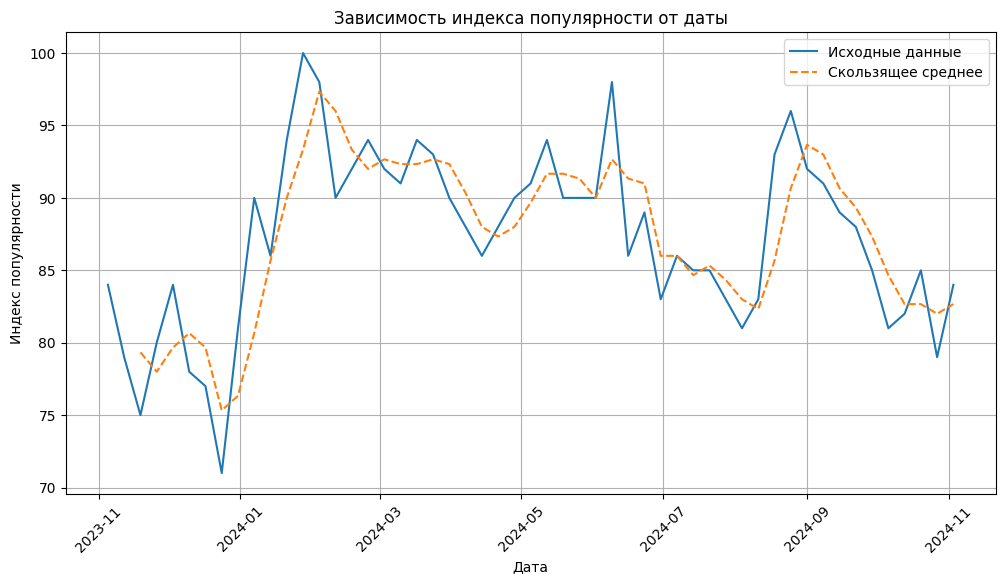

In [16]:
# Построение графика скользящего среднего
plt.figure(figsize=(12, 6))
plt.plot(results_df['date'], results_df['Original Data'], label='Исходные данные')
plt.plot(results_df['date'], results_df['Moving Average'], label='Скользящее среднее', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Индекс популярности')
plt.title('Зависимость индекса популярности от даты')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

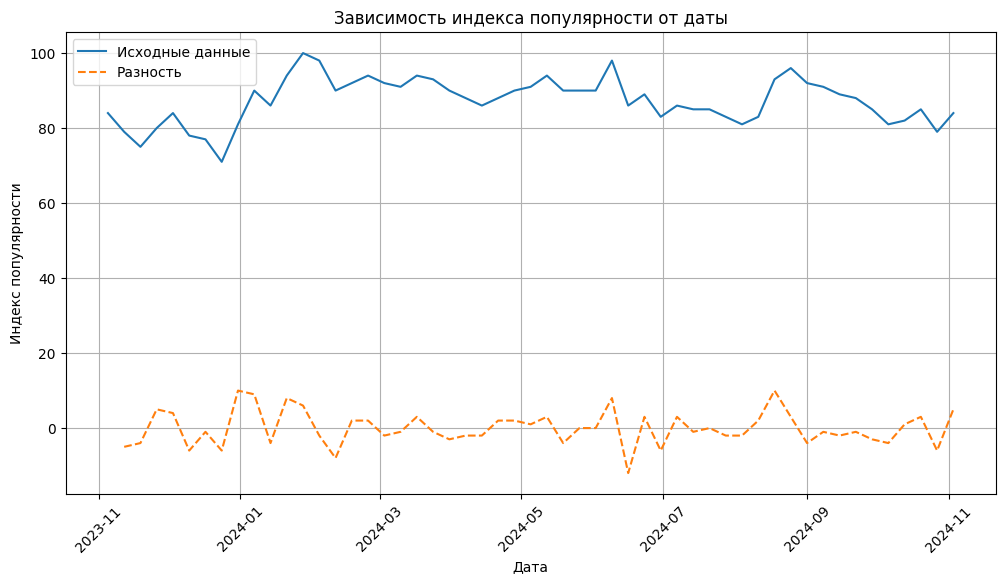

In [17]:
# Построение графика скользящего разности
plt.figure(figsize=(12, 6))
plt.plot(results_df['date'], results_df['Original Data'], label='Исходные данные')
plt.plot(results_df['date'], results_df['Differential'], label='Разность', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Индекс популярности')
plt.title('Зависимость индекса популярности от даты')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

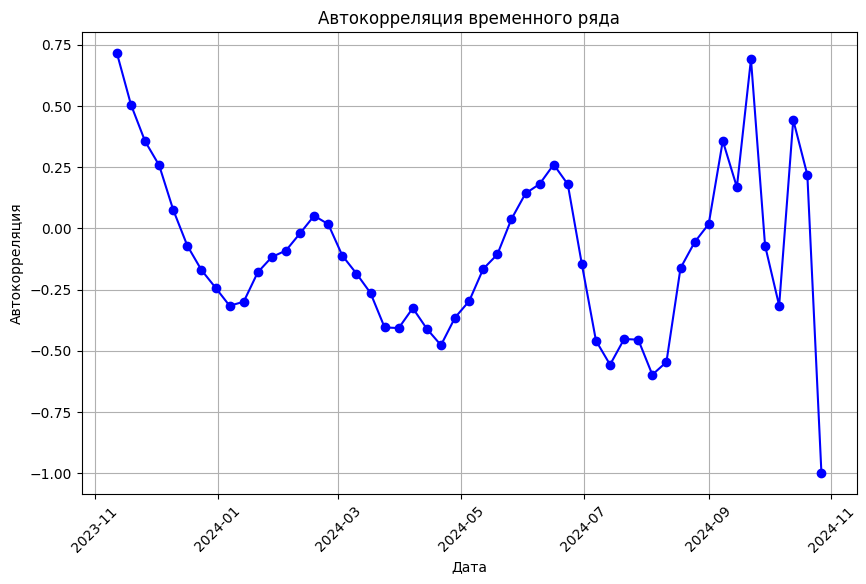

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['date'], results_df['Autocorrelation'], marker='o', linestyle='-', color='blue')

# Настройка графика
plt.xlabel('Дата')
plt.ylabel('Автокорреляция')
plt.title('Автокорреляция временного ряда')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

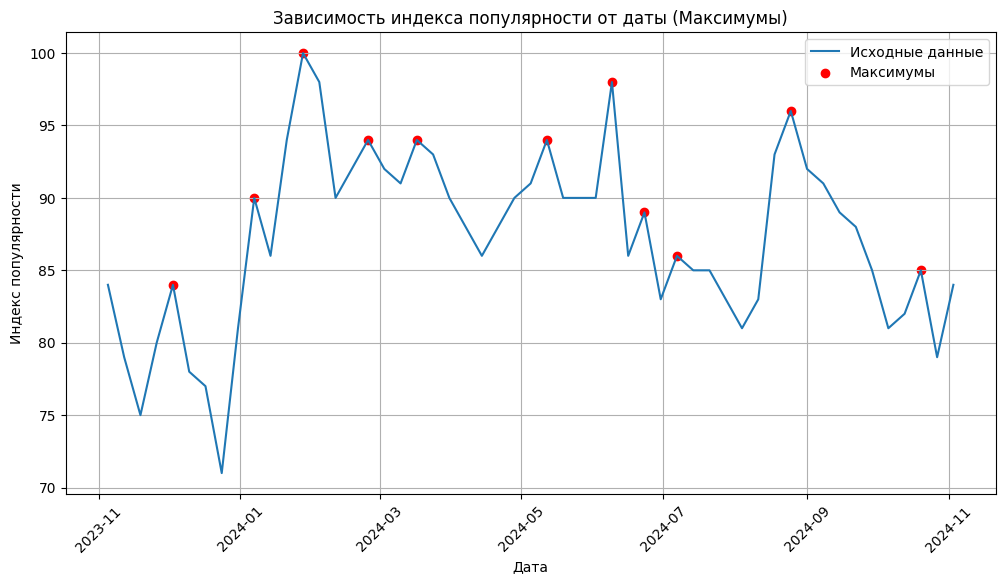

In [19]:
# Построение графика для максимумов
plt.figure(figsize=(12, 6))
plt.plot(results_df['date'], results_df['Original Data'], label='Исходные данные')
plt.scatter(results_df['date'][results_df['Maxima'].notna()], results_df['Maxima'][results_df['Maxima'].notna()], 
      color='red', marker='o', label='Максимумы')
plt.xlabel('Дата')
plt.ylabel('Индекс популярности')
plt.title('Зависимость индекса популярности от даты (Максимумы)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

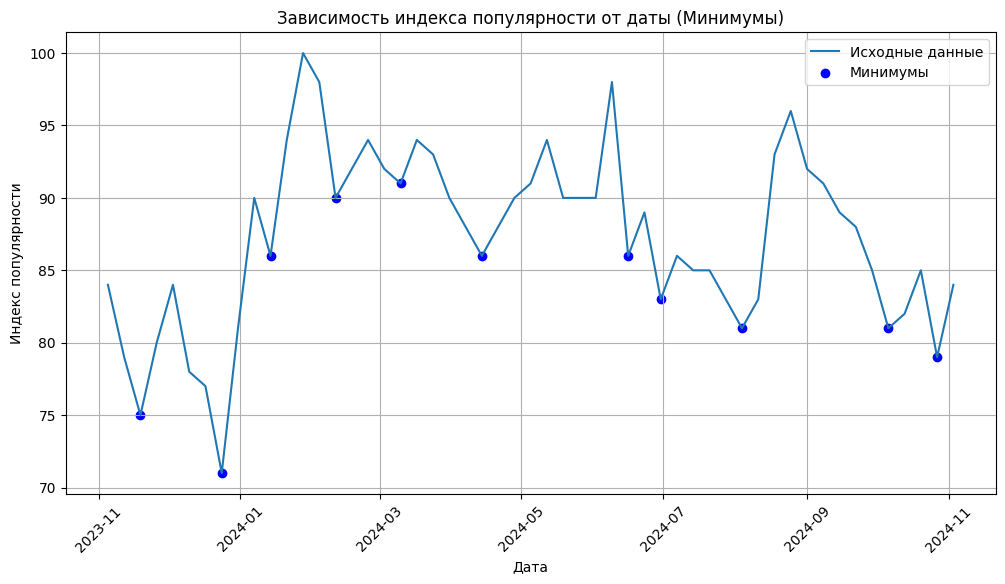

In [20]:
# Построение графика для минимумов
plt.figure(figsize=(12, 6))
plt.plot(results_df['date'], results_df['Original Data'], label='Исходные данные')
plt.scatter(results_df['date'][results_df['Minima'].notna()], results_df['Minima'][results_df['Minima'].notna()], 
      color='blue', marker='o', label='Минимумы')
plt.xlabel('Дата')
plt.ylabel('Индекс популярности')
plt.title('Зависимость индекса популярности от даты (Минимумы)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()